## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
gpp_df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
gpp_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
gpp_df.shape

(907, 27)

In [4]:
print(gpp_df.describe())

       capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0   

In [5]:
print(gpp_df.isnull().sum())

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64


Dropping the columns with high number of missing values.

In [6]:
print(gpp_df['year_of_capacity_data'].unique())

[  nan 2019.]


In [7]:
col_drop = ['other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2014',
            'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018',
            'generation_gwh_2019','estimated_generation_gwh','year_of_capacity_data']

gpp_df.drop(columns=col_drop, inplace=True)

Imputing the relatively less missing values with mean, median and mode

In [8]:
gpp_df['latitude'].fillna(gpp_df['latitude'].median(), inplace=True)
gpp_df['longitude'].fillna(gpp_df['longitude'].median(), inplace=True)
gpp_df['commissioning_year'].fillna(gpp_df['commissioning_year'].mode()[0], inplace=True)
gpp_df['geolocation_source'].fillna(gpp_df['geolocation_source'].mode()[0], inplace=True)
gpp_df['generation_data_source'].fillna(gpp_df['generation_data_source'].mode()[0], inplace=True)

In [9]:
gpp_df['other_fuel1_missing'] = gpp_df['other_fuel1'].isnull().astype(int)
gpp_df['owner_missing'] = gpp_df['owner'].isnull().astype(int)

In [10]:
print(gpp_df.describe())

       capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.227439   77.427103         2004.594267   
std     590.085456    6.080491    4.815073           15.734928   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1998.000000   
50%      59.200000   21.780000   76.719500         2014.000000   
75%     385.250000   25.176450   79.206100         2015.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       other_fuel1_missing  owner_missing  
count           907.000000     907.000000  
mean              0.781698       0.622933  
std               0.413321       0.484919  
min               0.000000       0.000000  
25%               1.000000       0.000000  
50%               1.000000       1.000000  
75%               1.000000       1.000000  
max               1.000000       1.000000  


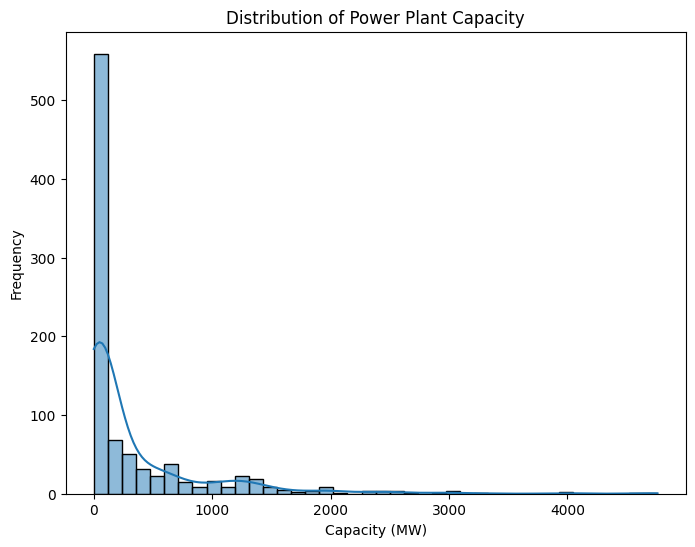

In [11]:
plt.figure(figsize=(8,6))
sb.histplot(data=gpp_df, x='capacity_mw', bins=40, kde=True)
plt.xlabel('Capacity (MW)')
plt.ylabel('Frequency')
plt.title('Distribution of Power Plant Capacity')
plt.show()

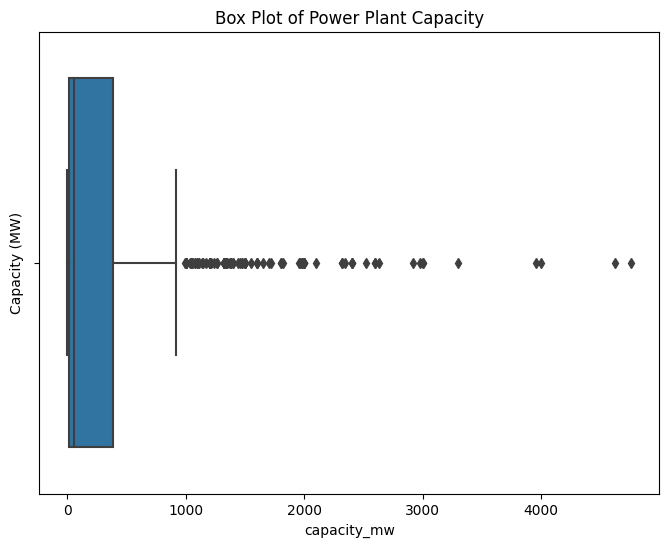

In [12]:
plt.figure(figsize=(8,6))
sb.boxplot(data=gpp_df, x='capacity_mw')
plt.ylabel('Capacity (MW)')
plt.title('Box Plot of Power Plant Capacity')
plt.show()

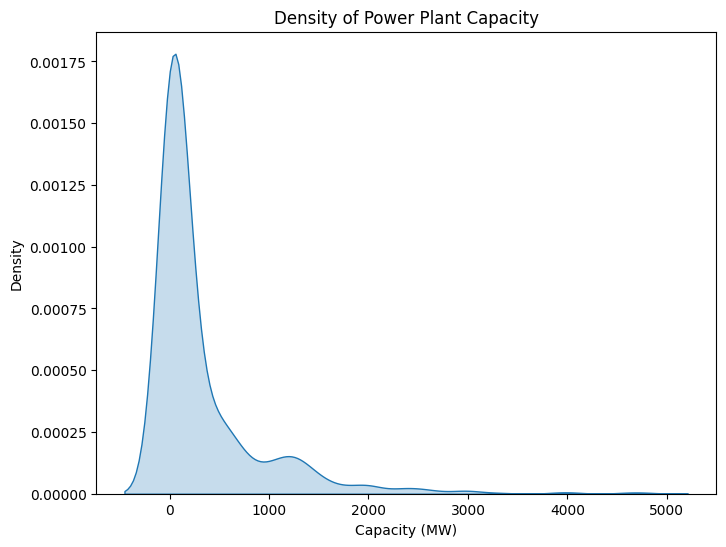

In [13]:
plt.figure(figsize=(8,6))
sb.kdeplot(data=gpp_df, x='capacity_mw', fill=True)
plt.xlabel('Capacity (MW)')
plt.title('Density of Power Plant Capacity')
plt.show()

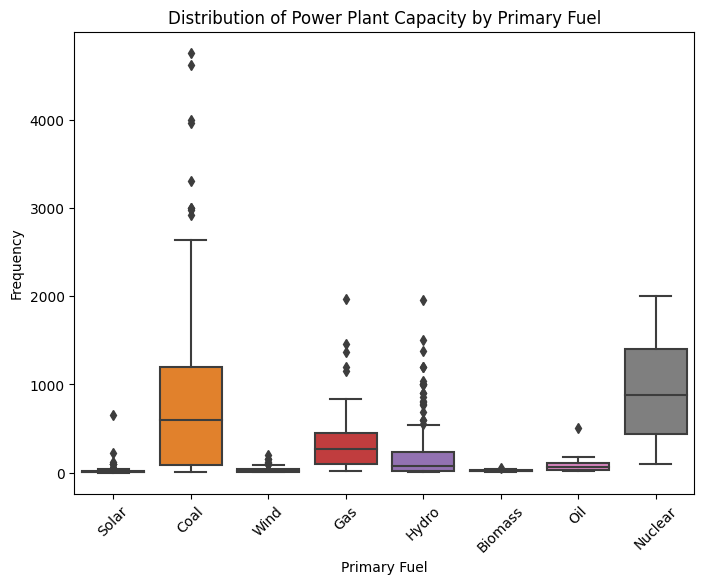

In [14]:
plt.figure(figsize=(8,6))
sb.boxplot(data=gpp_df, x='primary_fuel', y='capacity_mw')
plt.xlabel('Primary Fuel')
plt.ylabel('Frequency')
plt.title('Distribution of Power Plant Capacity by Primary Fuel')
plt.xticks(rotation=45)
plt.show()

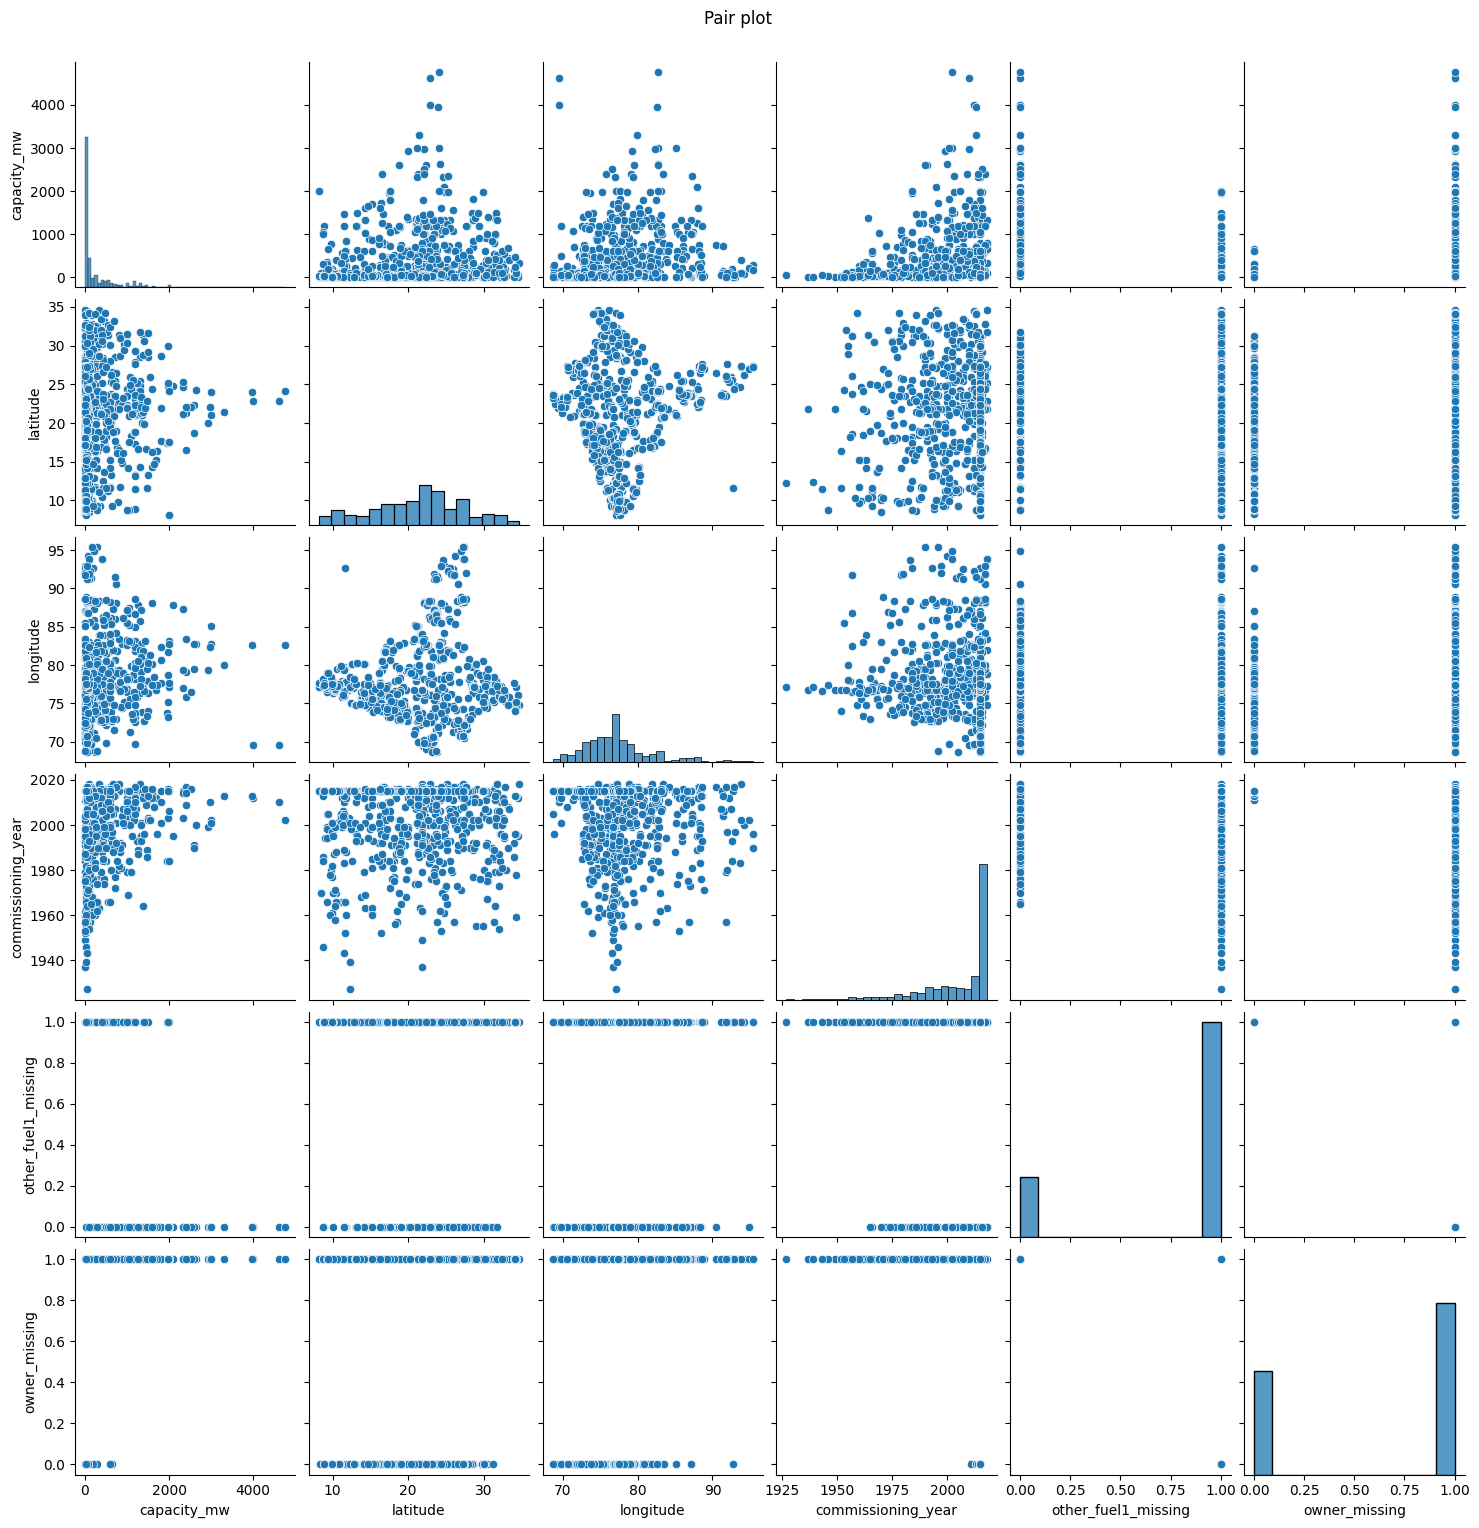

In [15]:
sb.pairplot(data=gpp_df)
plt.suptitle('Pair plot', y = 1.02)
plt.show()

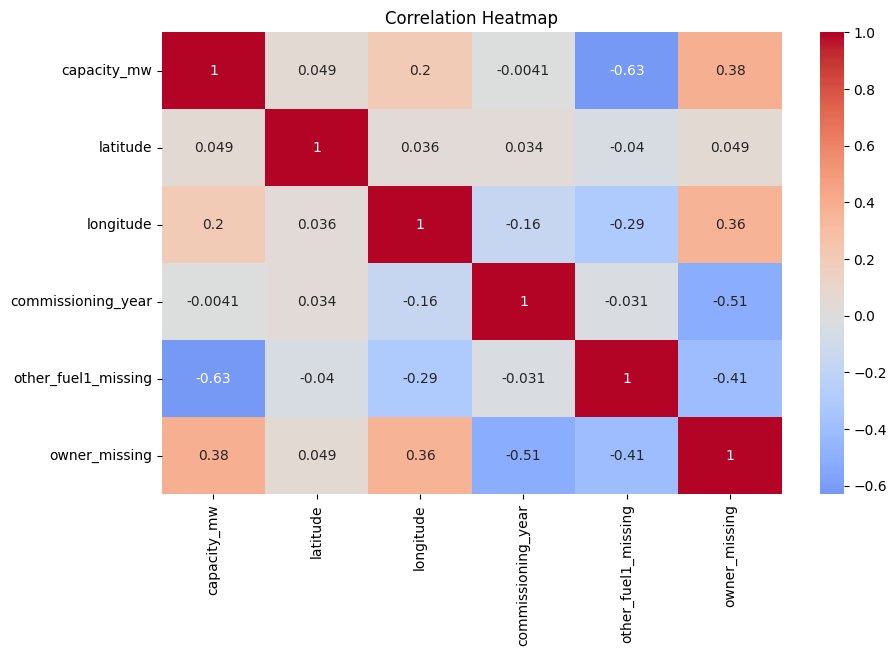

In [16]:
corr_mat = gpp_df.corr()
plt.figure(figsize=(10,6))
sb.heatmap(corr_mat, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

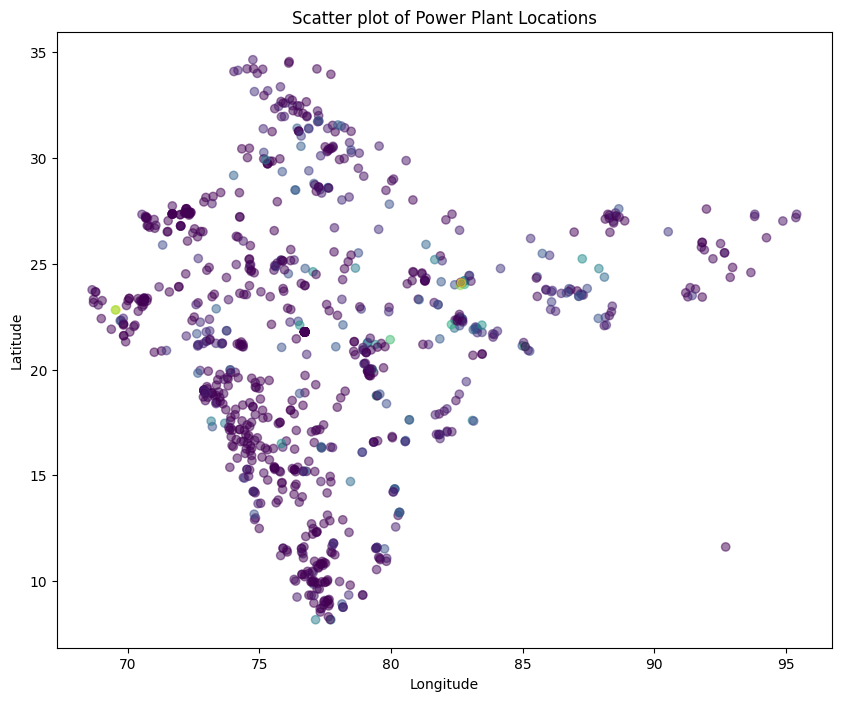

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(gpp_df['longitude'], gpp_df['latitude'], c=gpp_df['capacity_mw'], cmap='viridis', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of Power Plant Locations')
plt.show()

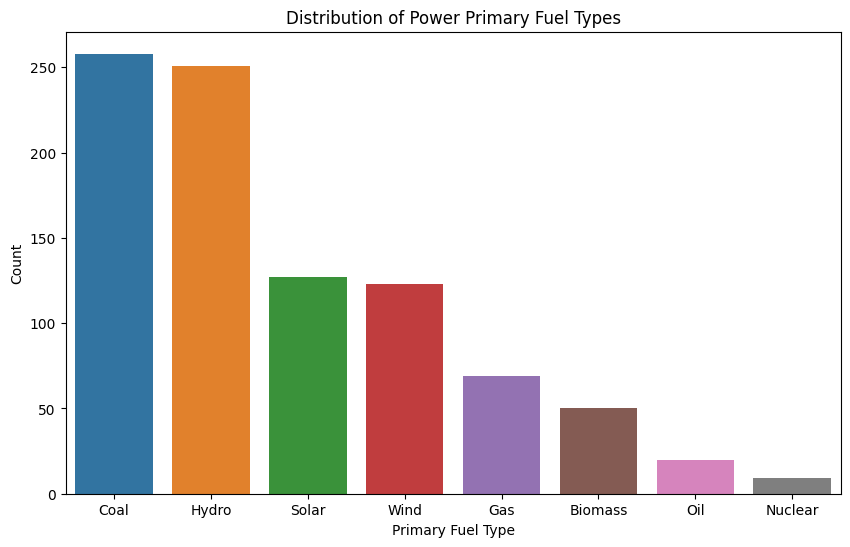

In [18]:
plt.figure(figsize=(10,6))
sb.countplot(data = gpp_df, x='primary_fuel', order=gpp_df['primary_fuel'].value_counts().index)
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.title('Distribution of Power Primary Fuel Types')
plt.show()

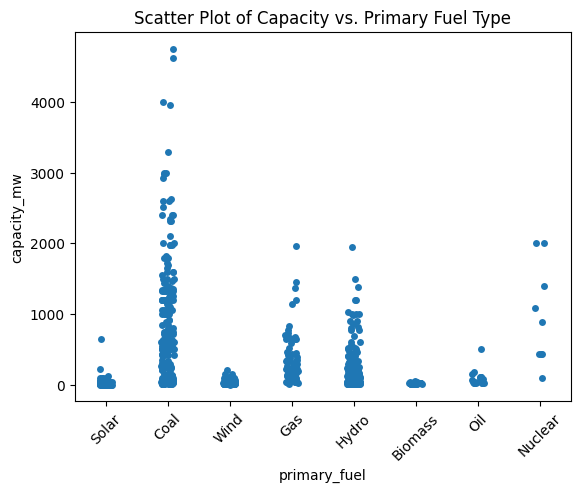

In [19]:
sb.stripplot(data=gpp_df, x='primary_fuel', y='capacity_mw', jitter=True)
plt.xticks(rotation=45)
plt.title("Scatter Plot of Capacity vs. Primary Fuel Type")
plt.show()

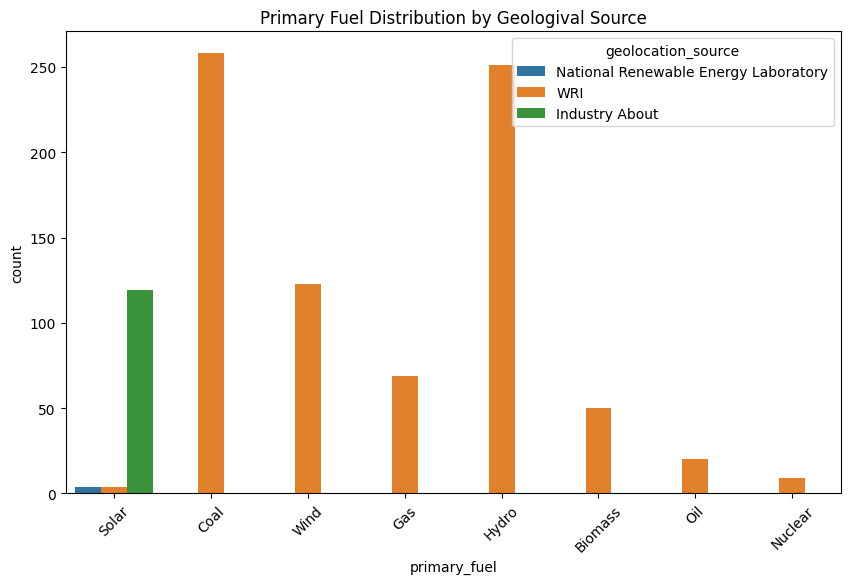

In [20]:
plt.figure(figsize=(10,6))
sb.countplot(data=gpp_df, x = 'primary_fuel', hue='geolocation_source')
plt.xticks(rotation=45)
plt.title("Primary Fuel Distribution by Geologival Source")
plt.show()

Data preprocessing


In [21]:
X = gpp_df.drop(columns=['primary_fuel','name','country_long','country','gppd_idnr','url','generation_data_source'])
y = gpp_df['primary_fuel']

In [22]:
X.head()

,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,owner,source,geolocation_source,other_fuel1_missing,owner_missing
0,2.5,28.1839,73.2407,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,1,0
1,98.0,24.7663,74.6090,NaN,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,1,0
2,39.2,21.9038,69.3732,NaN,2015.0,AES,CDM,WRI,1,0
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,Central Electricity Authority,WRI,1,1
4,1800.0,21.9603,82.4091,Oil,2015.0,NaN,Central Electricity Authority,WRI,0,1


In [23]:
numeric_col = X.select_dtypes(include=['float64','int64']).columns.tolist()
print("Numerical - ", numeric_col)

categoric_col = X.select_dtypes(include=['object']).columns.tolist()
print("Categorical - ", categoric_col)

Numerical -  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'other_fuel1_missing', 'owner_missing']
Categorical -  ['other_fuel1', 'owner', 'source', 'geolocation_source']


In [24]:
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, numeric_col),
        ('cat', cat_transformer, categoric_col)
    ]
)


X_preprocessed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed,y,test_size=0.2, random_state=42)

In [25]:
m_lr = LogisticRegression()
m_lr.fit(X_train, y_train)

y_pred_lr = m_lr.predict(X_test)
print("Claasification Report - LogisticRegression\n")
print(classification_report(y_test, y_pred_lr))

accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy)

Claasification Report - LogisticRegression

              precision    recall  f1-score   support

     Biomass       0.50      0.60      0.55         5
        Coal       0.89      0.98      0.93        48
         Gas       0.40      0.11      0.17        18
       Hydro       0.76      0.97      0.85        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         6
       Solar       1.00      0.94      0.97        16
        Wind       1.00      1.00      1.00        28

    accuracy                           0.83       182
   macro avg       0.57      0.57      0.56       182
weighted avg       0.77      0.83      0.79       182

Accuracy: 0.8296703296703297


In [26]:
m_dt = DecisionTreeClassifier()
m_dt.fit(X_train, y_train)

y_pred_dt = m_dt.predict(X_test)
print("Claasification Report - DecisionTreeClassifier\n")
print(classification_report(y_test, y_pred_dt))

accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy)

Claasification Report - DecisionTreeClassifier

              precision    recall  f1-score   support

     Biomass       0.50      0.60      0.55         5
        Coal       0.87      0.81      0.84        48
         Gas       0.53      0.56      0.54        18
       Hydro       0.83      0.93      0.88        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.33      0.17      0.22         6
       Solar       1.00      0.94      0.97        16
        Wind       1.00      1.00      1.00        28

    accuracy                           0.82       182
   macro avg       0.63      0.63      0.62       182
weighted avg       0.81      0.82      0.82       182

Accuracy: 0.8241758241758241


In [27]:
m_rf = RandomForestClassifier()
m_rf.fit(X_train,y_train)

y_pred_rf = m_rf.predict(X_test)

print("Claasification Report - RandomForestClassifier\n")
print(classification_report(y_test, y_pred_rf))

accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Claasification Report - RandomForestClassifier

              precision    recall  f1-score   support

     Biomass       0.57      0.80      0.67         5
        Coal       0.90      0.94      0.92        48
         Gas       0.92      0.61      0.73        18
       Hydro       0.84      1.00      0.91        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         6
       Solar       1.00      0.94      0.97        16
        Wind       1.00      1.00      1.00        28

    accuracy                           0.88       182
   macro avg       0.65      0.66      0.65       182
weighted avg       0.85      0.88      0.86       182

Accuracy: 0.8846153846153846


In [28]:
m_svc = SVC()
m_svc.fit(X_train,y_train)

y_pred_svc = m_svc.predict(X_test)

print("Claasification Report - Support Vector Classifier\n")
print(classification_report(y_test, y_pred_svc))

accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy:", accuracy)

Claasification Report - Support Vector Classifier

              precision    recall  f1-score   support

     Biomass       0.43      0.60      0.50         5
        Coal       0.89      0.98      0.93        48
         Gas       0.00      0.00      0.00        18
       Hydro       0.73      1.00      0.85        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         6
       Solar       1.00      0.94      0.97        16
        Wind       1.00      1.00      1.00        28

    accuracy                           0.83       182
   macro avg       0.51      0.56      0.53       182
weighted avg       0.72      0.83      0.77       182

Accuracy: 0.8296703296703297


Based on the classifciation report and accuracy, we will be choosing Random Forest Classifier

In [29]:
con_mat = confusion_matrix(y_test, y_pred_rf)

print("Confusion Matrix - Random Forest Classifier\n")
print(con_mat)


Confusion Matrix - Random Forest Classifier

[[ 4  1  0  0  0  0  0  0]
 [ 3 45  0  0  0  0  0  0]
 [ 0  2 11  4  0  1  0  0]
 [ 0  0  0 58  0  0  0  0]
 [ 0  0  1  2  0  0  0  0]
 [ 0  1  0  5  0  0  0  0]
 [ 0  1  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 28]]


In [30]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(m_rf, X_train, y_train, cv = 5)

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.90344828 0.88275862 0.91034483 0.92413793 0.91034483]
Mean CV Score: 0.9062068965517242


Mean Cross-Validation Score indicates good model performance.

HyperParameter Tuning

In [31]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100,200,300],
    'max_depth': [None,5,10,20],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator = m_rf, param_distributions = param_dist, n_iter=10, cv =5, n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print('Best Hyperparameters:', best_params)

best_classifier = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}


In [32]:
best_classifier = RandomForestClassifier(
    n_estimators= 100,
    min_samples_split= 5,
    min_samples_leaf=1,
    max_depth=None,
    bootstrap=False
)
best_classifier.fit(X_train,y_train)

y_pred = best_classifier.predict(X_test)

print("Claasification Report - RandomForestClassifier\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Claasification Report - RandomForestClassifier

              precision    recall  f1-score   support

     Biomass       0.60      0.60      0.60         5
        Coal       0.90      0.96      0.93        48
         Gas       0.85      0.61      0.71        18
       Hydro       0.84      0.98      0.90        58
     Nuclear       0.00      0.00      0.00         3
         Oil       0.00      0.00      0.00         6
       Solar       1.00      1.00      1.00        16
        Wind       1.00      1.00      1.00        28

    accuracy                           0.88       182
   macro avg       0.65      0.64      0.64       182
weighted avg       0.85      0.88      0.86       182

Accuracy: 0.8846153846153846


We can see slight improvement in accuracy

Now, predicting the capacity_mw

In [33]:
X1 = gpp_df.drop(columns=['capacity_mw','name','country_long','country','gppd_idnr','url','generation_data_source'])
y1 = gpp_df['capacity_mw']

In [34]:
X1.head()

,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,geolocation_source,other_fuel1_missing,owner_missing
0,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,1,0
1,24.7663,74.6090,Coal,NaN,2015.0,Ultratech Cement ltd,Ultratech Cement ltd,WRI,1,0
2,21.9038,69.3732,Wind,NaN,2015.0,AES,CDM,WRI,1,0
3,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,WRI,1,1
4,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,WRI,0,1


In [35]:
numeric_col1 = X1.select_dtypes(include=['float64','int64']).columns.tolist()
print("Numerical - ", numeric_col1)

categoric_col1 = X1.select_dtypes(include=['object']).columns.tolist()
print("Categorical - ", categoric_col1)

Numerical -  ['latitude', 'longitude', 'commissioning_year', 'other_fuel1_missing', 'owner_missing']
Categorical -  ['primary_fuel', 'other_fuel1', 'owner', 'source', 'geolocation_source']


In [36]:
encoded_df = pd.get_dummies(X1, columns=categoric_col1, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(encoded_df,y1,test_size=0.2, random_state=42)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [38]:
#Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)
print("Linear Regression:")
print("MSE -", mse_lin_reg, "\nR-squared -", r2_lin_reg)


#DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred_dt_reg = dt_reg.predict(X_test)
mse_dt_reg = mean_squared_error(y_test, y_pred_dt_reg)
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)
print("\nDecision Tree Regressor:")
print("MSE -", mse_dt_reg, "\nR-squared -", r2_dt_reg)

#Random Forest Regression

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred_rf_reg = rf_reg.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)
print("\nRandom Forest Regression:")
print("MSE -", mse_rf_reg, "\nR-squared -", r2_rf_reg)

# XGBoost

xg_reg = XGBRegressor()
xg_reg.fit(X_train, y_train)
y_pred_xg_reg = xg_reg.predict(X_test)
mse_xg_reg = mean_squared_error(y_test, y_pred_xg_reg)
r2_xg_reg = r2_score(y_test, y_pred_xg_reg)
print("\nXG Boost:")
print("MSE -", mse_xg_reg, "\nR-squared -", r2_xg_reg)

#SVM
svm_reg = SVR()
svm_reg.fit(X_train, y_train)
y_pred_svm_reg = svm_reg.predict(X_test)
mse_svm_reg = mean_squared_error(y_test, y_pred_svm_reg)
r2_svm_reg = r2_score(y_test, y_pred_svm_reg)
print("\nXG Boost:")
print("MSE -", mse_svm_reg, "\nR-squared -", r2_svm_reg)

Linear Regression:
MSE - 9.855718586962657e+26 
R-squared - -3.233622776770846e+21

Decision Tree Regressor:
MSE - 323377.43070789566 
R-squared - -0.060988720613365244

Random Forest Regression:
MSE - 160517.34235927128 
R-squared - 0.4733488687407569

XG Boost:
MSE - 173288.46846690553 
R-squared - 0.43144730275926924

XG Boost:
MSE - 371144.46930690005 
R-squared - -0.2177105087100304


Random Forest Regression and XGBoost look better

In [39]:
k = 5
random_forest_scores = cross_val_score(rf_reg, encoded_df, y1, cv=k, scoring='neg_mean_squared_error')
xgboost_scores = cross_val_score(xg_reg, encoded_df, y1, cv=k, scoring='neg_mean_squared_error')

avg_random_forest_mse = -random_forest_scores.mean()
avg_xgboost_mse = -xgboost_scores.mean()

print(f"Random Forest Average MSE: {avg_random_forest_mse}")
print(f"XGBoost Average MSE: {avg_xgboost_mse}")

Random Forest Average MSE: 205754.74189517685
XGBoost Average MSE: 236418.7143696143


Since Random Forest has lower MSE average value. It is the better performing model

In [40]:
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(rf_reg, param_distributions=param_dist_rf, n_iter=10, scoring='neg_mean_squared_error', cv=5)
random_search_rf.fit(X_train, y_train)

best_params_rf = random_search_rf.best_params_
best_rf = random_search_rf.best_estimator_

rf_mse = mean_squared_error(y_test, best_rf.predict(X_test))
print("Random Forest Best Parameters:", best_params_rf)
print("Random Forest Best MSE:", rf_mse)

Random Forest Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}
Random Forest Best MSE: 156734.76762903002


In [41]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

random_search_xgb = RandomizedSearchCV(xg_reg, param_distributions=param_dist_xgb, n_iter=10, scoring='neg_mean_squared_error', cv=5)
random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
best_xgb = random_search_xgb.best_estimator_

xgb_mse = mean_squared_error(y_test, best_xgb.predict(X_test))
print("XGBoost Best Parameters:", best_params_xgb)
print("XGBoost Best MSE:", xgb_mse)

XGBoost Best Parameters: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
XGBoost Best MSE: 128447.49704720896


Based on the hyperparameter tuning, xgboost performs better with lower MSE

In [42]:
new_data = encoded_df.head(1)

xg_predictions = best_xgb.predict(new_data)
print(xg_predictions)

[79.59739]


In [43]:
joblib.dump(best_classifier, 'random_forest_model.joblib')
joblib.dump(best_xgb, 'xgboost_model.joblib')

loaded_rf_model = joblib.load('random_forest_model.joblib')
loaded_xgb_model = joblib.load('xgboost_model.joblib')